## Megamove
In this notebook I first replicate the Megamove model from Trommersheuser et al, for selecting the optimal 
movement end point in a landscape of expected gains. Then I will extend that idea to 3d space

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [2]:
# parameters
g0 = 100 # the gain if the target region is hit
g1 = -150 # the gain if the penalty region is hit

xs, ys = np.meshgrid(np.linspace(-10,10),np.linspace(-10,10))

In [6]:
def gauss2d(x,y,var,x_max,y_max):
    return np.exp( -( (x-x_max)**2 + (y-y_max)**2) /(2*var))/(2*np.pi*var)

In [7]:
def plotgaussian(ranges,xmax,ymax,var):
    xs, ys = np.meshgrid(np.linspace(-ranges,ranges),np.linspace(-ranges,ranges))
    gaussian = gauss2d(xs,ys,var,xmax,ymax)
    plt.imshow(gaussian)
    plt.show()

In [8]:
interact(plotgaussian,ranges=100,xmax=(0,10),ymax=(0,10),var=(1,100))

<function __main__.plotgaussian>

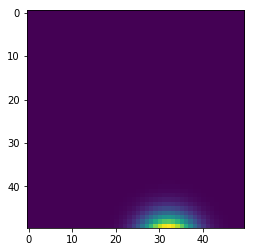

In [9]:
gaussian = gauss2d(xs,ys,3,3,12)
plt.imshow(gaussian)
plt.show()